# Multiple-linear model for US

In [1]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [2]:
# read the us data
us_df = pd.read_csv("db/us_energy.csv")
us_df.head()


,Unnamed: 0,Year,Produced Renewable(Billion Btu),Total Consumed(Billion Btu),GDP(Million dollar),Population(Thousand),Energy Price(dollars in million btu)
0,0,1970,4070021.0,67720114.0,0.0,205052.0,1.65
1,1,1971,4262212.0,69163993.0,0.0,207661.0,1.76
2,2,1972,4382009.0,72677208.0,0.0,209896.0,1.84
3,3,1973,4410938.0,75723857.0,0.0,211909.0,2.02
4,4,1974,4741851.0,73914525.0,0.0,213854.0,2.87


In [3]:
# add the difference column
us_df["Difference"] = us_df["Produced Renewable(Billion Btu)"]-us_df["Total Consumed(Billion Btu)"]
us_df.tail()

,Unnamed: 0,Year,Produced Renewable(Billion Btu),Total Consumed(Billion Btu),GDP(Million dollar),Population(Thousand),Energy Price(dollars in million btu),Difference
43,43,2013,9242048.0,97099401.0,16495400.0,316058.0,21.42,-87857353.0
44,44,2014,9600941.0,98267257.0,16899800.0,318386.0,21.33,-88666316.0
45,45,2015,9565096.0,97364113.0,17386700.0,320743.0,17.30,-87799017.0
46,46,2016,10225357.0,97230097.0,17659200.0,323071.0,15.94,-87004740.0
47,47,2017,11094237.0,97621515.0,18050700.0,325147.0,17.30,-86527278.0


In [4]:
# Select X and y values
X =us_df[["Year", "Produced Renewable(Billion Btu)", "Population(Thousand)",
           "Energy Price(dollars in million btu)"]]
y =us_df["Difference"].values.reshape(-1,1)
print(X.shape, y.shape)

(48, 4) (48, 1)


In [5]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(36, 4)
(36, 1)
(12, 4)


In [6]:
# create the linear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# make predictiions and display r2

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 10093875774930.29, R2: 0.8595146119557204


### Create simple linear regression model to make predictiions for the selected features for future predictions

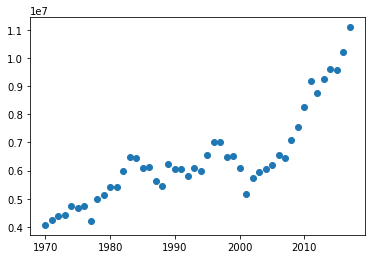

In [8]:
# make predictions for renewable production
X1 = us_df["Year"].values.reshape(-1,1)
y1 = us_df["Produced Renewable(Billion Btu)"].values.reshape(-1,1)
plt.scatter(X1,y1)

In [9]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=42)

In [10]:
# create the linear regression model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X1_train, y1_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#make predictiions and display r2

from sklearn.metrics import mean_squared_error

predictions1 = model1.predict(X1_test)
MSE1 = mean_squared_error(y1_test, predictions1)
r2 = model1.score(X1_test, y1_test)

print(f"MSE: {MSE1}, R2: {r2}")

MSE: 324545727725.1984, R2: 0.8177762558373929


In [12]:
# Make predictions for next 13 years
renewable =[]
for i in range(2018, 2031):
    r= model1.predict([[i]])
    renewable.append(float(r))
      
    
renewable

[8859831.953801751,
 8961888.550964028,
 9063945.148126304,
 9166001.74528858,
 9268058.342450887,
 9370114.939613163,
 9472171.53677544,
 9574228.133937716,
 9676284.731100023,
 9778341.3282623,
 9880397.925424576,
 9982454.522586852,
 10084511.119749159]

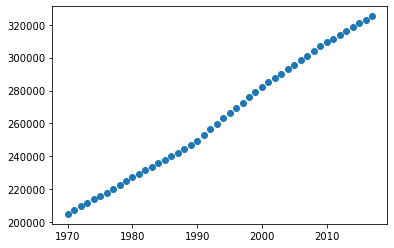

In [13]:
# make predictions for population
X2 = us_df["Year"].values.reshape(-1,1)
y2 = us_df["Population(Thousand)"].values.reshape(-1,1)
plt.scatter(X2,y2)

In [14]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [15]:
# create the linear regression model
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X2_train, y2_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#make predictiions and display r2

from sklearn.metrics import mean_squared_error

predictions2 = model2.predict(X2_test)
MSE2 = mean_squared_error(y2_test, predictions2)
r2 = model2.score(X2_test, y2_test)

print(f"MSE: {MSE2}, R2: {r2}")

MSE: 4186045.0085513243, R2: 0.9965091278514452


In [17]:
# make predictions for next 13 years
population = []
for i in range(2018, 2031):
    p = model2.predict([[i]])
    population.append(float(p))
    
population

[328837.9581328193,
 331506.0900369454,
 334174.22194107156,
 336842.3538451977,
 339510.48574932385,
 342178.61765345,
 344846.74955757614,
 347514.8814617023,
 350183.01336582843,
 352851.1452699546,
 355519.2771740807,
 358187.40907820687,
 360855.540982333]

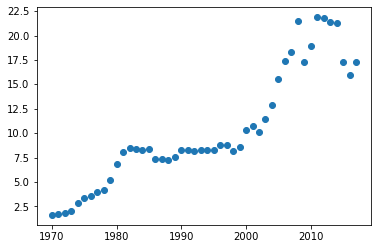

In [18]:
# make prediction for energy price

X3 = us_df["Year"].values.reshape(-1,1)
y3 = us_df["Energy Price(dollars in million btu)"].values.reshape(-1,1)
plt.scatter(X3,y3)

In [19]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

In [20]:
# create the linear regression model
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X3_train, y3_train)

#make predictiions and display r2

from sklearn.metrics import mean_squared_error

predictions3 = model3.predict(X3_test)
MSE3 = mean_squared_error(y3_test, predictions3)
r2 = model3.score(X3_test, y3_test)

print(f"MSE: {MSE3}, R2: {r2}")


MSE: 5.0325093328729364, R2: 0.8639014996473213


In [21]:
# make predictions for next 13 years
price = []

for i in range(2018, 2031):
    e = model3.predict([[i]])
    price.append(float(e))
    
price

[19.63712945139548,
 20.018404405600904,
 20.399679359806214,
 20.780954314011524,
 21.162229268216947,
 21.543504222422257,
 21.924779176627567,
 22.30605413083299,
 22.6873290850383,
 23.06860403924361,
 23.449878993449033,
 23.831153947654343,
 24.212428901859653]

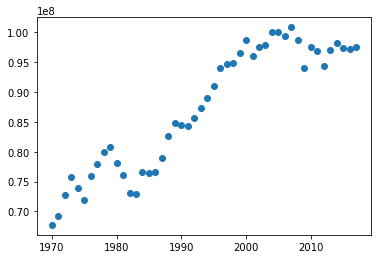

In [22]:
# # make prediction for total consumption

X4 = us_df["Year"].values.reshape(-1,1)
y4 = us_df["Total Consumed(Billion Btu)"].values.reshape(-1,1)
plt.scatter(X4,y4)

In [23]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state=42)

# create the linear regression model
from sklearn.linear_model import LinearRegression
model4 = LinearRegression()
model4.fit(X4_train, y4_train)

#make predictiions and display r2

from sklearn.metrics import mean_squared_error

predictions4 = model4.predict(X4_test)
MSE4 = mean_squared_error(y4_test, predictions3)
r2 = model3.score(X4_test, y4_test)

print(f"MSE: {MSE4}, R2: {r2}")


MSE: 7767957216743736.0, R2: -85.58293848139327


In [24]:
# make predictions for next 13 years
total_consumed = []

for i in range(2018, 2031):
    e = model4.predict([[i]])
    total_consumed.append(float(e))
    
total_consumed

[103921101.89990354,
 104623189.34966922,
 105325276.79943466,
 106027364.24920034,
 106729451.69896603,
 107431539.14873147,
 108133626.59849715,
 108835714.04826283,
 109537801.49802828,
 110239888.94779396,
 110941976.3975594,
 111644063.84732509,
 112346151.29709077]

In [26]:
# now make predictions for energy difference values
difference = []

list1 = [[2018,8859831.953801751,328837.9581328193,19.63712945139548], 
             [2019, 8961888.550964028,328837.9581328193,20.018404405600904],
             [2020,9063945.148126304,334174.22194107156,20.399679359806214],
             [2021,9166001.74528858,336842.3538451977,20.780954314011524],
             [2022,9268058.342450887,339510.48574932385,21.162229268216947],
             [2023,9370114.939613163,342178.61765345,21.543504222422257],
             [2024,9472171.53677544,344846.74955757614,21.924779176627567],
             [2025,9574228.133937716,347514.8814617023,22.30605413083299],
             [2026,9676284.731100023,350183.01336582843,22.6873290850383],
             [2027,9778341.3282623,352851.1452699546,23.06860403924361],
             [2028,9880397.925424576,355519.2771740807,23.449878993449033],
             [2029,9982454.522586852,358187.40907820687,23.831153947654343],
             [2030,10084511.119749159, 360855.540982333,24.212428901859653]] 
 
for i in list1:
    p = model.predict([i])
    difference.append(float(p))
    
difference 

[-95061269.94610178,
 -94957807.81525326,
 -96261331.65130842,
 -96861362.50391173,
 -97461393.35651505,
 -98061424.20911825,
 -98661455.06172156,
 -99261485.91432488,
 -99861516.76692796,
 -100461547.61953151,
 -101061578.47213471,
 -101661609.32473814,
 -102261640.17734122]

In [27]:
# create a dictionary that hold predicted values
prediction_dict = {
    "Year":[2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    "Produced Renewable(Billion Btu)": renewable,
    "Total Consumed(Billion Btu)": total_consumed,
    "Population(Thousand)": population,
    "Energy Price(dollars in million btu)": price,
    "Difference": difference
}

# create a dataframe 
prediction_df = pd.DataFrame(prediction_dict)
prediction_df

,Year,Produced Renewable(Billion Btu),Total Consumed(Billion Btu),Population(Thousand),Energy Price(dollars in million btu),Difference
0,2018,8.859832e+06,1.039211e+08,328837.958133,19.637129,-9.506127e+07
1,2019,8.961889e+06,1.046232e+08,331506.090037,20.018404,-9.495781e+07
2,2020,9.063945e+06,1.053253e+08,334174.221941,20.399679,-9.626133e+07
3,2021,9.166002e+06,1.060274e+08,336842.353845,20.780954,-9.686136e+07
4,2022,9.268058e+06,1.067295e+08,339510.485749,21.162229,-9.746139e+07
5,2023,9.370115e+06,1.074315e+08,342178.617653,21.543504,-9.806142e+07
6,2024,9.472172e+06,1.081336e+08,344846.749558,21.924779,-9.866146e+07
7,2025,9.574228e+06,1.088357e+08,347514.881462,22.306054,-9.926149e+07
8,2026,9.676285e+06,1.095378e+08,350183.013366,22.687329,-9.986152e+07
9,2027,9.778341e+06,1.102399e+08,352851.145270,23.068604,-1.004615e+08


In [28]:
# combine this prediction data frame with the original dataframe
dataframes = [us_df, prediction_df]
combined_df = pd.concat(dataframes, ignore_index=True)
pd.options.display.float_format = '{:.1f}'.format
combined_df

/Users/nadiregokcehan/anaconda3/envs/pythondata/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Difference,Energy Price(dollars in million btu),GDP(Million dollar),Population(Thousand),Produced Renewable(Billion Btu),Total Consumed(Billion Btu),Unnamed: 0,Year
0,-63650093.0,1.6,0.0,205052.0,4070021.0,67720114.0,0.0,1970
1,-64901781.0,1.8,0.0,207661.0,4262212.0,69163993.0,1.0,1971
2,-68295199.0,1.8,0.0,209896.0,4382009.0,72677208.0,2.0,1972
3,-71312919.0,2.0,0.0,211909.0,4410938.0,75723857.0,3.0,1973
4,-69172674.0,2.9,0.0,213854.0,4741851.0,73914525.0,4.0,1974
...,...,...,...,...,...,...,...,...
56,-99861516.8,22.7,nan,350183.0,9676284.7,109537801.5,nan,2026
57,-100461547.6,23.1,nan,352851.1,9778341.3,110239888.9,nan,2027
58,-101061578.5,23.4,nan,355519.3,9880397.9,110941976.4,nan,2028
59,-101661609.3,23.8,nan,358187.4,9982454.5,111644063.8,nan,2029


In [29]:
# drop the unnamed column
del combined_df["Unnamed: 0"]
combined_df

,Difference,Energy Price(dollars in million btu),GDP(Million dollar),Population(Thousand),Produced Renewable(Billion Btu),Total Consumed(Billion Btu),Year
0,-63650093.0,1.6,0.0,205052.0,4070021.0,67720114.0,1970
1,-64901781.0,1.8,0.0,207661.0,4262212.0,69163993.0,1971
2,-68295199.0,1.8,0.0,209896.0,4382009.0,72677208.0,1972
3,-71312919.0,2.0,0.0,211909.0,4410938.0,75723857.0,1973
4,-69172674.0,2.9,0.0,213854.0,4741851.0,73914525.0,1974
...,...,...,...,...,...,...,...
56,-99861516.8,22.7,nan,350183.0,9676284.7,109537801.5,2026
57,-100461547.6,23.1,nan,352851.1,9778341.3,110239888.9,2027
58,-101061578.5,23.4,nan,355519.3,9880397.9,110941976.4,2028
59,-101661609.3,23.8,nan,358187.4,9982454.5,111644063.8,2029


In [35]:
# select the columns to reorder
combined_df = combined_df[["Year", "Produced Renewable(Billion Btu)", "Total Consumed(Billion Btu)", 
                           "GDP(Million dollar)", "Population(Thousand)", "Energy Price(dollars in million btu)",
                           "Difference"]]
combined_df

,Year,Produced Renewable(Billion Btu),Total Consumed(Billion Btu),GDP(Million dollar),Population(Thousand),Energy Price(dollars in million btu),Difference
0,1970,4070021.0,67720114.0,0.0,205052.0,1.6,-63650093.0
1,1971,4262212.0,69163993.0,0.0,207661.0,1.8,-64901781.0
2,1972,4382009.0,72677208.0,0.0,209896.0,1.8,-68295199.0
3,1973,4410938.0,75723857.0,0.0,211909.0,2.0,-71312919.0
4,1974,4741851.0,73914525.0,0.0,213854.0,2.9,-69172674.0
...,...,...,...,...,...,...,...
56,2026,9676284.7,109537801.5,nan,350183.0,22.7,-99861516.8
57,2027,9778341.3,110239888.9,nan,352851.1,23.1,-100461547.6
58,2028,9880397.9,110941976.4,nan,355519.3,23.4,-101061578.5
59,2029,9982454.5,111644063.8,nan,358187.4,23.8,-101661609.3


Text(0, 0.5, 'Difference in Billion Btu')

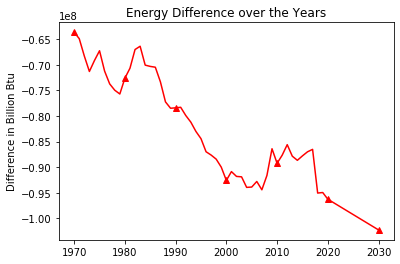

In [41]:
# see the energy difference value change over the years

plt.plot(combined_df["Year"], combined_df["Difference"], color="red", markevery=10, marker="^")
plt.title("Energy Difference over the Years")
plt.ylabel("Difference in Billion Btu")

Text(0, 0.5, 'Renewable Produuctiion(Billion Btu)')

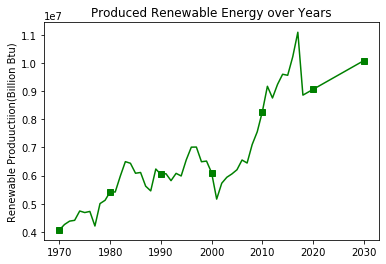

In [42]:
# see the renewable production change over the years

plt.plot(combined_df["Year"], combined_df["Produced Renewable(Billion Btu)"], marker="s",markevery = 10, color = "green")
plt.title("Produced Renewable Energy over Years")
plt.ylabel("Renewable Produuctiion(Billion Btu)")

In [43]:
# print the predicted values for 2030
combined_df.loc[combined_df["Year"] == 2030]

,Year,Produced Renewable(Billion Btu),Total Consumed(Billion Btu),GDP(Million dollar),Population(Thousand),Energy Price(dollars in million btu),Difference
60,2030,10084511.1,112346151.3,nan,360855.5,24.2,-102261640.2


In [44]:
# save the final df to csv
combined_df.to_csv("db/us_combined.csv", float_format='%.1f')

# Analysis

* For Us data, deciding which features to use was the first step. The data was mostly linear, over the years (1970-2017) the features `Population`, `Energy Price`, `Renewable Production`, `GDP` numbers were increasing. 
* Since we didn't have GDP values before 1997 removing that column from the features impored our model's r2 score. We used 47 years historical data for US to predict `Energy Difference` values that is the difference between Renewable Production and Total Energy Consumption. 
* Using simple linear regression model we predicted features, Renewable Produuction, Average Energy Price and Population values for the future and used those predicted numbers to make prediction for Difference values. 
* Scaling our data didn't improve our r2 and MSE numbers and we didn't scale our data. 
* Finally we used miltiple-linear regression model to predict next 13 years Energy Difference values. 
